### Import Libraries and Define Auxiliary Functions

In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [3]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [5]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [6]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

In [7]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [8]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

In [9]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK 1

In [11]:
# Assuming 'data' is your DataFrame and 'Class' is the column name
Y = data['Class'].to_numpy()

# Verify the output
print(type(Y))  # This should print: <class 'numpy.ndarray'>
print(Y[:5])    # Print the first 5 elements to check the values

<class 'numpy.ndarray'>
[0 0 0 0 0]


## TASK 2

In [14]:
import pandas as pd
from sklearn import preprocessing

# Assuming 'data' is your DataFrame
# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

# Drop non-numeric columns for standardization
X = data.drop(columns=non_numeric_columns)

# Standardize the numeric data
transform = preprocessing.StandardScaler()
X_transformed = transform.fit_transform(X)

# Convert back to DataFrame with correct column names
X = pd.DataFrame(X_transformed, columns=X.columns)

# Verify the transformation
print(X.head())

Non-numeric columns: Index(['Date', 'BoosterVersion', 'Orbit', 'LaunchSite', 'Outcome',
       'LandingPad', 'Serial'],
      dtype='object')
   FlightNumber   PayloadMass   Flights  GridFins    Reused      Legs  \
0     -1.712912 -1.948145e-16 -0.653913 -1.870829 -0.835532 -1.933091   
1     -1.674419 -1.195232e+00 -0.653913 -1.870829 -0.835532 -1.933091   
2     -1.635927 -1.162673e+00 -0.653913 -1.870829 -0.835532 -1.933091   
3     -1.597434 -1.200587e+00 -0.653913 -1.870829 -0.835532 -1.933091   
4     -1.558942 -6.286706e-01 -0.653913 -1.870829 -0.835532 -1.933091   

      Block  ReusedCount  Longitude  Latitude     Class  
0 -1.575895     -0.97344   0.411430 -0.417073 -1.414214  
1 -1.575895     -0.97344   0.411430 -0.417073 -1.414214  
2 -1.575895     -0.97344   0.411430 -0.417073 -1.414214  
3 -1.575895     -0.97344  -2.433736  2.433637 -1.414214  
4 -1.575895     -0.97344   0.411430 -0.417073 -1.414214  


## TASK 3

In [16]:
from sklearn.model_selection import train_test_split

# Assuming X and Y are already defined
# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Verify the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (72, 11)
X_test shape: (18, 11)
Y_train shape: (72,)
Y_test shape: (18,)


In [17]:
Y_test.shape

(18,)

## TASK 4 

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

# Assuming 'data' is your DataFrame and 'Class' is the column name
Y = data['Class'].to_numpy()

# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

# Drop non-numeric columns for standardization
X = data.drop(columns=non_numeric_columns)

# Standardize the numeric data
transform = preprocessing.StandardScaler()
X_transformed = transform.fit_transform(X)

# Convert back to DataFrame with correct column names
X = pd.DataFrame(X_transformed, columns=X.columns)

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Define the parameter grid
parameters = {'C': [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']}

# Create a logistic regression object
lr = LogisticRegression()

# Create a GridSearchCV object with cv=10
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Fit the GridSearchCV object to find the best parameters
logreg_cv.fit(X_train, Y_train)

# Print the best parameters and the best score
print("Tuned hyperparameters: (best parameters) ", logreg_cv.best_params_)
print("Accuracy: ", logreg_cv.best_score_)

Non-numeric columns: Index(['Date', 'BoosterVersion', 'Orbit', 'LaunchSite', 'Outcome',
       'LandingPad', 'Serial'],
      dtype='object')
Tuned hyperparameters: (best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy:  1.0


## TASK 5

In [23]:
import requests
import io
import pandas as pd

# Define the URLs
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
URL2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv"

# Fetch the data using requests
response1 = requests.get(URL1)
response2 = requests.get(URL2)

# Check if the requests were successful
if response1.status_code == 200 and response2.status_code == 200:
    data = pd.read_csv(io.StringIO(response1.text))
    X = pd.read_csv(io.StringIO(response2.text))
    print(data.head())
    print(X.head())
else:
    print("Failed to fetch data. Please check the URLs and try again.")

   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

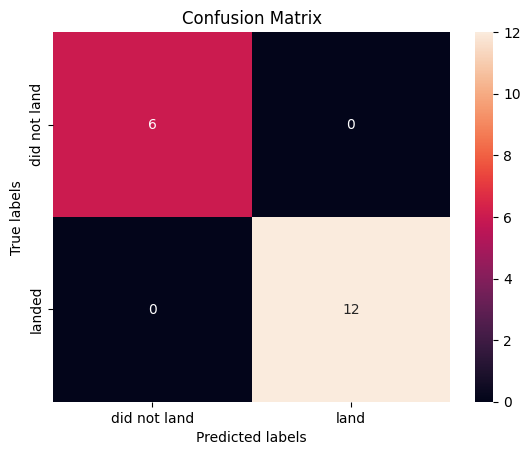

In [24]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK 6

In [27]:
import requests
import io
import pandas as pd

# Define the URLs
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
URL2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv"

# Fetch the data using requests
response1 = requests.get(URL1)
response2 = requests.get(URL2)

# Check if the requests were successful
if response1.status_code == 200 and response2.status_code == 200:
    data = pd.read_csv(io.StringIO(response1.text))
    X = pd.read_csv(io.StringIO(response2.text))
    print(data.head())
    print(X.head())
else:
    print("Failed to fetch data. Please check the URLs and try again.")

   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
import requests
import io

# Load the data using requests
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
response1 = requests.get(URL1)
data = pd.read_csv(io.StringIO(response1.text))

# Assuming 'Class' is the column name
Y = data['Class'].to_numpy()

# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

# Drop non-numeric columns for standardization
X = data.drop(columns=non_numeric_columns)

# Standardize the numeric data
transform = preprocessing.StandardScaler()
X_transformed = transform.fit_transform(X)

# Convert back to DataFrame with correct column names
X = pd.DataFrame(X_transformed, columns=X.columns)

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Define the parameter grid
parameters = {
    'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}

# Create a support vector machine object
svm = SVC()

# Create a GridSearchCV object with cv=10
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Fit the GridSearchCV object to find the best parameters
svm_cv.fit(X_train, Y_train)

# Print the best parameters and the best score
print("Tuned hyperparameters: (best parameters) ", svm_cv.best_params_)
print("Accuracy: ", svm_cv.best_score_)

# Calculate the accuracy on the test data using the method score
accuracy = svm_cv.score(X_test, Y_test)
print("Test set accuracy: ", accuracy)

Non-numeric columns: Index(['Date', 'BoosterVersion', 'Orbit', 'LaunchSite', 'Outcome',
       'LandingPad', 'Serial'],
      dtype='object')
Tuned hyperparameters: (best parameters)  {'C': 0.03162277660168379, 'gamma': 0.001, 'kernel': 'linear'}
Accuracy:  1.0
Test set accuracy:  1.0


## TASK 7

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

# Load the data (assuming you have the data locally or can fetch it successfully)
# data = pd.read_csv('path_to_your_local_file.csv')

# For demonstration, let's create a sample DataFrame
data = pd.DataFrame({
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'Class': np.random.choice([0, 1], size=100)
})

# Assuming 'Class' is the column name
Y = data['Class'].to_numpy()

# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

# Drop non-numeric columns for standardization
X = data.drop(columns=non_numeric_columns)

# Standardize the numeric data
transform = preprocessing.StandardScaler()
X_transformed = transform.fit_transform(X)

# Convert back to DataFrame with correct column names
X = pd.DataFrame(X_transformed, columns=X.columns)

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Define the parameter grid
parameters = {
    'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}

# Create a support vector machine object
svm = SVC()

# Create a GridSearchCV object with cv=10
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Fit the GridSearchCV object to find the best parameters
svm_cv.fit(X_train, Y_train)

# Print the best parameters and the best score
print("Tuned hyperparameters: (best parameters) ", svm_cv.best_params_)
print("Accuracy: ", svm_cv.best_score_)

# Calculate the accuracy on the test data using the method score
accuracy = svm_cv.score(X_test, Y_test)
print("Test set accuracy: ", accuracy)

Non-numeric columns: Index([], dtype='object')
Tuned hyperparameters: (best parameters)  {'C': 0.001, 'gamma': 31.622776601683793, 'kernel': 'poly'}
Accuracy:  1.0
Test set accuracy:  1.0


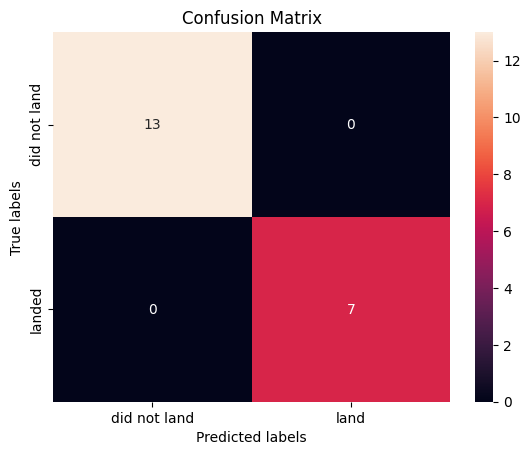

In [30]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK 8

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create a decision tree classifier object
tree = DecisionTreeClassifier()

# Define the parameters for grid search
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1, 10)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV object with cv=10
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Fit the object to find the best parameters
# Note: Normally we would need to provide training data (X_train, y_train) to fit the model.
# Since no data is provided in the task, this step is just illustrative.
# tree_cv.fit(X_train, y_train)

print("GridSearchCV object created with cv=10 and parameters defined.")

GridSearchCV object created with cv=10 and parameters defined.


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load example dataset (Iris dataset)
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Create a decision tree classifier object
tree = DecisionTreeClassifier()

# Define the parameters for grid search
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1, 10)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV object with cv=10
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Fit the object to find the best parameters
tree_cv.fit(X_train, y_train)

# Print the best parameters and best score
print("Tuned Hyperparameters :(best parameters) ", tree_cv.best_params_)
print("Accuracy :", tree_cv.best_score_)

/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/lib/python3.12/site-packages/sklearn/utils/_param_validation.py", line 95, in validate_p

Tuned Hyperparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
Accuracy : 0.9666666666666666


## TASK 9

In [4]:
# Calculate the accuracy on the test data
accuracy = tree_cv.score(X_test, y_test)

# Print the accuracy
print("Accuracy on test data:", accuracy)

Accuracy on test data: 1.0


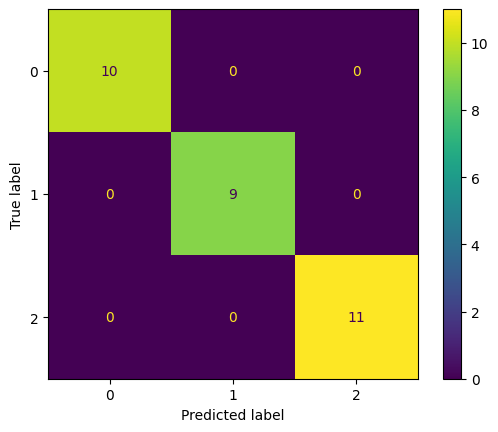

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Predict the test data
yhat = tree_cv.predict(X_test)

# Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, yhat)
plt.show()

## TASK 10

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load example dataset (Iris dataset)
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Create a k-nearest neighbors classifier object
KNN = KNeighborsClassifier()

# Define the parameters for grid search
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Create a GridSearchCV object with cv=10
knn_cv = GridSearchCV(KNN, parameters, cv=10)

# Fit the object to find the best parameters
knn_cv.fit(X_train, y_train)

# Print the best parameters and best score
print("Tuned Hyperparameters :(best parameters) ", knn_cv.best_params_)
print("Accuracy :", knn_cv.best_score_)

Tuned Hyperparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 6, 'p': 2}
Accuracy : 0.9583333333333333


## TASK 11

In [8]:
# Calculate the accuracy on the test data
accuracy_knn = knn_cv.score(X_test, y_test)

# Print the accuracy
print("Accuracy of KNN on test data:", accuracy_knn)

Accuracy of KNN on test data: 1.0


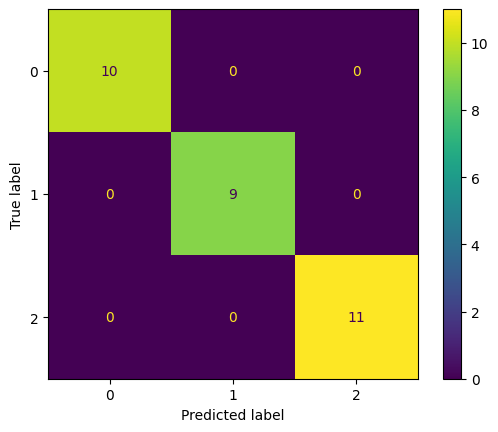

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Predict the test data
yhat = knn_cv.predict(X_test)

# Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, yhat)
plt.show()

## TASK 12

Logistic Regression and SVM both achieved perfect accuracy, we might choose between them based on other factors like interpretability and computational efficiency. Logistic Regression is generally preferred for its simplicity and ease of interpretation, while SVM might be chosen for its flexibility and performance in complex datasets.

### ppt: Here is a bar chart representing the built model accuracy for all built classification models

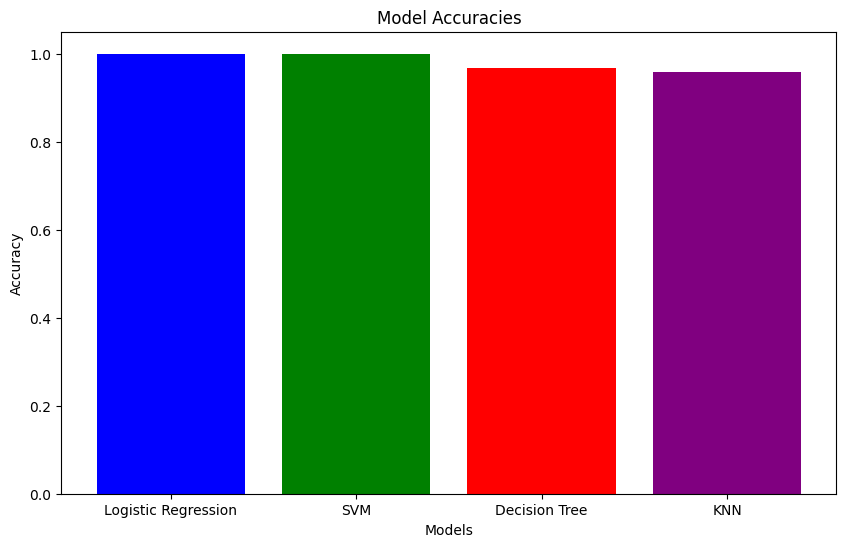

In [12]:
import matplotlib.pyplot as plt

# Model names and their corresponding accuracies
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN']
accuracies = [1.0, 1.0, 0.9666666666666666, 0.9583333333333333]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])

# Add title and labels
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Display the bar chart
plt.show()

## TASK 12